Glove- Embading

###Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/4-1_Semester/practice code/Sentiment Analysis/IMDB Dataset.csv')
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
dataset.sentiment = dataset.sentiment.apply(lambda x: 0 if x =='negative' else 1)
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


### Data cleaning

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]

for i in range(0, 50000):
  review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)
  print(len(corpus), end=' -- ') 
  print(len(corpus[i]))

Streaming output truncated to the last 5000 lines.
45001 -- 431
45002 -- 736
45003 -- 202
45004 -- 466
45005 -- 481
45006 -- 966
45007 -- 533
45008 -- 1527
45009 -- 328
45010 -- 424
45011 -- 695
45012 -- 529
45013 -- 144
45014 -- 432
45015 -- 539
45016 -- 449
45017 -- 907
45018 -- 2221
45019 -- 223
45020 -- 1493
45021 -- 267
45022 -- 164
45023 -- 403
45024 -- 729
45025 -- 702
45026 -- 1249
45027 -- 594
45028 -- 1031
45029 -- 2455
45030 -- 370
45031 -- 107
45032 -- 3123
45033 -- 477
45034 -- 143
45035 -- 1153
45036 -- 430
45037 -- 1026
45038 -- 420
45039 -- 471
45040 -- 759
45041 -- 347
45042 -- 801
45043 -- 584
45044 -- 451
45045 -- 434
45046 -- 1171
45047 -- 2735
45048 -- 286
45049 -- 588
45050 -- 802
45051 -- 745
45052 -- 472
45053 -- 1791
45054 -- 251
45055 -- 310
45056 -- 398
45057 -- 778
45058 -- 228
45059 -- 424
45060 -- 357
45061 -- 243
45062 -- 685
45063 -- 641
45064 -- 478
45065 -- 436
45066 -- 903
45067 -- 1292
45068 -- 386
45069 -- 204
45070 -- 518
45071 -- 350
45072 -- 210


In [ ]:
corpus[ : 2]

['one review mention watch oz episod hook right exactli happen br br first thing struck oz brutal unflinch scene violenc set right word go trust not show faint heart timid show pull punch regard drug sex violenc hardcor classic use word br br call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci not high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away br br would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc not violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that

### Data transformation (GLOVE)



In [ ]:
!python -m pip install -U gensim
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-09-27 20:03:09--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-09-27 20:03:10--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-09-27 20:03:10--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awa

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec

#glove_input_file = glove_filename
glove_path = '/content/glove.6B.100d.txt'
word2vec_output_file = '/content/glove.6B.100d.txt'+'.word2vec'
glove2word2vec(glove_path, word2vec_output_file)

(400000, 100)

In [ ]:
from gensim.models import KeyedVectors
model = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

In [ ]:
class Word2VecVectorizer:
  def __init__(self, model):
    print("Loading in word vectors...")
    self.word_vectors = model
    print("Finished loading in word vectors")

  def fit(self, data):
    pass

  def transform(self, data):
    # determine the dimensionality of vectors
    v = self.word_vectors.get_vector('king')
    self.D = v.shape[0]

    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.split()
      vecs = []
      m = 0
      for word in tokens:
        try:
          # throws KeyError if word not found
          vec = self.word_vectors.get_vector(word)
          vecs.append(vec)
          m += 1
        except KeyError:
          pass
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X


  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)

In [ ]:
X = corpus
y = dataset.iloc[:, -1].values

### Dividing dataset into training and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
dataset.sentiment.unique()

array([1, 0])

In [ ]:
vectorizer = Word2VecVectorizer(model)
# Get the sentence embeddings for the train dataset
X_train = vectorizer.fit_transform(X_train)
y_train = y_train
y_train = y_train.astype('int')
# Get the sentence embeddings for the test dataset
X_test = vectorizer.transform(X_test)
y_test = y_test
y_test = y_test.astype('int')

Loading in word vectors...
Finished loading in word vectors
Numer of samples with no words found: 0 / 40000
Numer of samples with no words found: 0 / 10000


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40000, 100) (40000,)
(10000, 100) (10000,)


### Model fitting

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
# # Exporting NB Classifier to later use in prediction
# import joblib
# joblib.dump(classifier, './drive/MyDrive/Project2_Sentiment_Analysis/c2_Classifier_Sentiment_Model') 

###Model performance

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[[3654 1307]
 [1770 3269]]


0.6923

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Bag of Words')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3654 1307]
 [1770 3269]]
precision:0.714 
recall:0.649
F1 score: 0.680
AUC: 0.6926
Accuracy: 69.23%


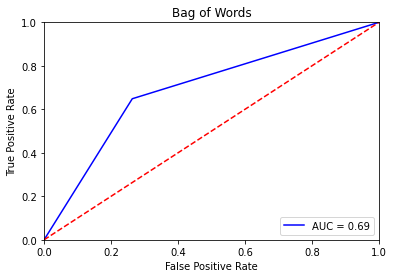

In [ ]:
evaluate(y_test, y_pred)

### Logistic Regression

In [ ]:
from sklearn import linear_model
classifier = linear_model.LogisticRegression(C=1.5)
classifier.fit(X_train, y_train)
y_pred= classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3742 1219]
 [1168 3871]]


0.7613

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('LOGISTIC REGRESSION')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3742 1219]
 [1168 3871]]
precision:0.761 
recall:0.768
F1 score: 0.764
AUC: 0.7612
Accuracy: 76.13%


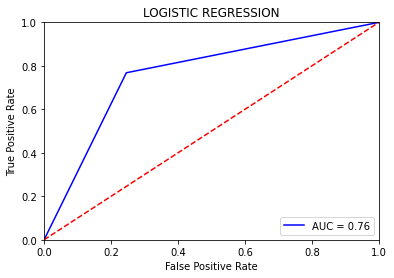

In [ ]:
evaluate(y_test, y_pred)

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(max_depth =20, criterion='entropy', random_state=42)  # max_dept - best_at 20

dct.fit(X_train, y_train)
y_pred= dct.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[3124 1837]
 [1894 3145]]


0.6269

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """

    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('Decision Tree')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3124 1837]
 [1894 3145]]
precision:0.631 
recall:0.624
F1 score: 0.628
AUC: 0.6269
Accuracy: 62.69%


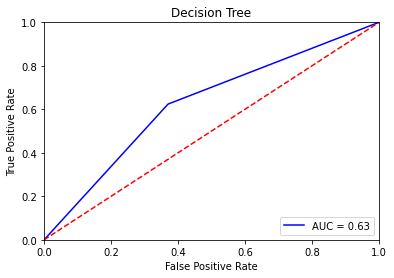

In [ ]:
evaluate(y_test, y_pred)

### XG Boost Classifier

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_dept =20, n_estimators=1000)  # Changable, n_estimators =1000(increase) learning_rate = 0.01
xgb.fit(X_train, y_train)
y_pred= xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('XgBoost')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3740 1221]
 [1184 3855]]
precision:0.759 
recall:0.765
F1 score: 0.762
AUC: 0.7595
Accuracy: 75.95%


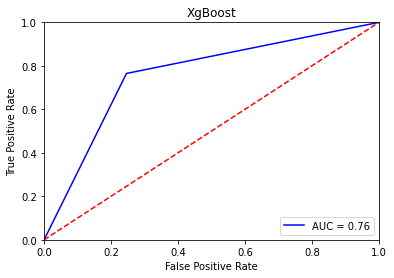

In [ ]:
evaluate(y_test, y_pred)

### K-Nearest Neighbours(KNN)

In [ ]:
import sklearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# n_neighbiors = [7:64.86%, 10:65.74%, 15:68.28%, 20:69.85%, 22:70.08%,  ]
knn = KNeighborsClassifier(n_neighbors = 25, algorithm = 'brute')  # brute - brute force algorithm
knn.fit(X_train, y_train)
y_pred= knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_fscore_support

def evaluate(y_test, y_pred):
    """
    - Print AUC and accuracy on the test set
    - Plot ROC
    @params    probs (np.array): an array of predicted probabilities with shape (len(y_true), 2)
    @params    y_true (np.array): an array of the true values with shape (len(y_true),)
    """
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average = 'binary')
    print(f"precision:{precision:.3f} \nrecall:{recall:.3f}\nF1 score: {f1:.3f}")

    # preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    print(f'AUC: {roc_auc:.4f}')

    
    # Get accuracy over the test set
    # y_pred = np.where(preds >= 0.5, 1, 0)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy*100:.2f}%')
    
    # Plot ROC AUC
    plt.title('KNN')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

[[3624 1337]
 [1540 3499]]
precision:0.724 
recall:0.694
F1 score: 0.709
AUC: 0.7124
Accuracy: 71.23%


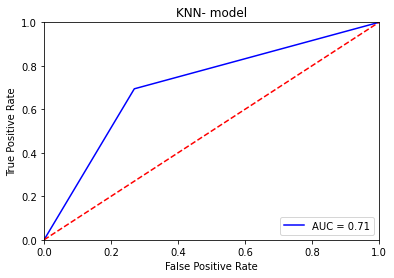

In [ ]:
evaluate(y_test, y_pred)